###  ![alt text here](https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg)

<h1><center>Numpy.Random</center></h1>

### Purpose of the Package

In [1]:
# Firstly import all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### What is Numpy & Numpy.random

"Numpy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems.[1]

Numpy.random is a built in package within Numpy which can produce pseudo random nunbers using combinations of a BitGenerator to create sequences and a generator to use those sequences to sample form different statistical distributions[2]. Essentially numpy.random generates whole arrays of seemingly random data spread across a probability distribution.

From randomising initial weights in an artificial nerural network, splitting data into random sets, or shuffling the data within your dataset, the ability ot generate random data is essential to any data analyst/ statistician or enthusiast. If you provide a computer with an input, you will expect to revice an output, if all things the same, you provide the same input, you will receive the same output. This type of determinism is what makes computers so poor at generating random numbers without some form of human intervention.

The random numbers produced on the back of this human intervention are  referreed to  as pseudo-random numbers (with some exceptions, but that's for another day). These pseudo-random numbers appear random, but they are predetermined, and can be easily and accurately predicted, which we will discuss in the seeds section.

## Simple Random Data

From the Random Generator documentation[3] there are 4 sub-categories of simple random data generators:

1. integers (rng.integers)
2. random (rng.random)
3. choice (rng.choice)
4. bytes (.bytes)- out of scope


#### 1. Integers (rng.integers)
Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)
      
      "Returns random integers from low(inclusive) to hight(exclusiuve),or if endpoint=True, low (inclusive) to high (inclusive)"[4]
      
The above essentially means that .integers returns random integers inclusive of the low, up to but not including the high point. It will return an invclusive endpoint if endpoint = Ture
   
Let's explore the above in a bit more detail.

In [2]:
rng = np.random.default_rng()
rng.integers(3,size=(15))

array([0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2], dtype=int64)

So we can see in the above output is an array of 15 numbers between 0 & 2, so therefore our rng.integers(3, size=15) has used the low of 3 as an exclusive endpoint and 0 as an inclusive startpoint, this is due tpo no endpoint being provided, the size =15 is quite obviously the number of ints to be produced.

We can further amend our code to provide even more dynamic arrays, for example a 3x15 array

In [3]:
rng.integers(3,size=(3,15))

array([[1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1],
       [0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1],
       [0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 1]], dtype=int64)

Ok, so let's explore how the random numbers are distributed when generated rtandomly between 1 & 4. In order to get a fair representation of how these numbers are distriburted we will pass in a size of 1,000. We should expect about 250 results for each number between 1 - 4 if the selection is following the “discrete uniform” distribution.

In [4]:
xint = rng.integers(1, 5,size = 1000)

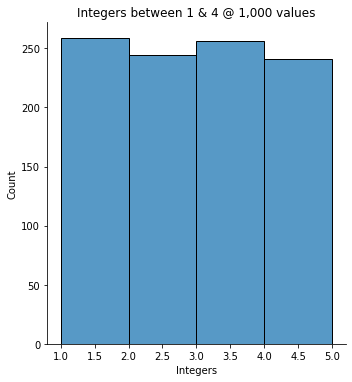

In [5]:
ax = sns.displot(xint,bins = [1,2,3,4,5])
ax.set(xlabel = "Integers")
plt.title("Integers between 1 & 4 @ 1,000 values")
plt.show()

So for a sample size of 1000, we get a somewhat even distribution, but not quite what we had envisioned. If we increase the size of the array, we should see the graph trend towards a more even distribution. (size = 10,000)

In [6]:
xint = rng.integers(1, 5,size = 10000)

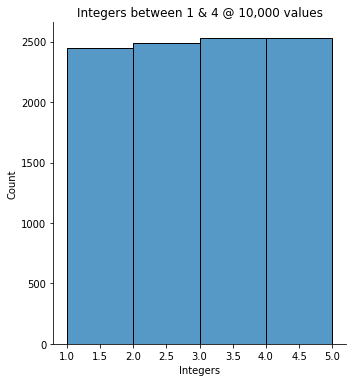

In [7]:
ax = sns.displot(xint,bins = [1,2,3,4,5])
plt.title("Integers between 1 & 4 @ 10,000 values")
ax.set(xlabel = "Integers")
plt.show()

The results of are trending towards an even distribution of 25% each, we can expect as as size variable increases the graphed variance in cumulative results will decrease. 

#### 2. Random (rng.random)
Generator.random(size=None, dtype=np.float64, out=None)
    
    "Return random floats in the half-open interval [0.0, 1.0].[5]"
    
So rng.random will provide and array of random floating point numbers between 0 and 1, of a specified size.

Let's see what this means.

In [8]:
rng = np.random.default_rng()
xrand = rng.random()
xrand

0.5363906697614841

Above we can see rng.random has produced a floating point number between 0 & 1, see type check below:

In [9]:
type(xrand)

float

So as with rng.integers above we will see what sort of distribution the integers are produced at ofr 1000 results.

In [10]:
xrand = rng.random(1000)

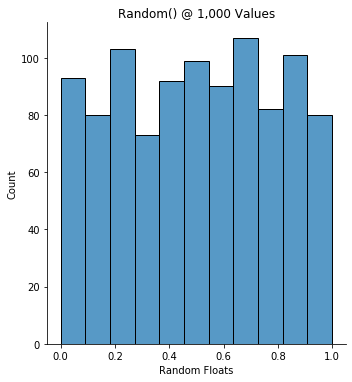

In [11]:
ax = sns.displot(xrand)
ax.set(xlabel = "Random Floats")
plt.title("Random() @ 1,000 Values")
plt.show()

Do we see the same results as before with the graph trending towards an even distribution when increasing the size of our array?

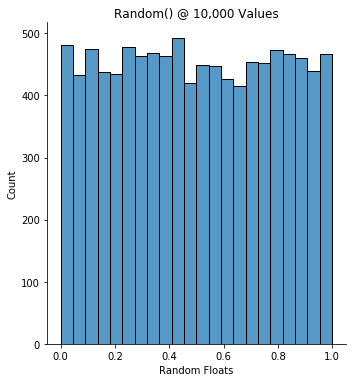

In [12]:
xrand = rng.random(10000)
ax = sns.displot(xrand)
ax.set(xlabel = "Random Floats")
plt.title("Random() @ 10,000 Values")
plt.show()

It appears that the vaiance is slightly less than a size of 1000, but the difference here is not as pronounced as with the random.integers function, however the overall distribution appears to be fairly even it may be necessary to expand the size of the array further to get better data:


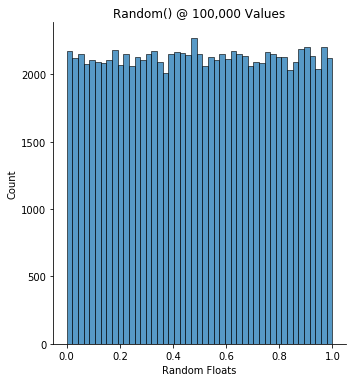

In [13]:
xrand = rng.random(100000)
ax = sns.displot(xrand)
ax.set(xlabel = "Random Floats")
plt.title("Random() @ 100,000 Values")
plt.show()

As we can see from above, the graphs are again tranding towards a uniform distribution. We can explian the requirement for further increasing the size of the array's to see the same results given that we were instructing Numpy to select floats at random between 0 &  1, rather than just pick one of 4 as per rng.integers above.

#### 3. Choice (rng.choice)

 Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
 
     "Generates a random sample from a given 1-D array"[6]
     
Pretty self-explainatory - let's see how the random sampling works in practice.

In [14]:
rng.choice(4, 50)

array([3, 1, 3, 0, 2, 2, 2, 0, 3, 1, 0, 1, 0, 3, 2, 3, 2, 0, 2, 0, 1, 1,
       2, 2, 3, 3, 1, 0, 1, 0, 0, 0, 1, 2, 0, 3, 3, 1, 2, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 1, 0], dtype=int64)

Above the choice function seems to pick integers between a start point of 0 and an exclusive endpoint of 4, or as the documentation states and array of np.arrange(a) where a is the first argument of the function (in our case above: 4). rng.choice(a, 50) will return 50 results. As per the above modules, let's map this out in visual data and see how rng.choice's distribution will compare.

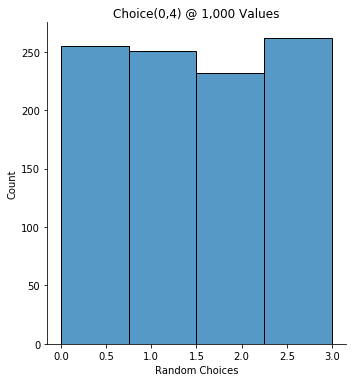

In [15]:
xcho = rng.choice((4), 1000)
ax = sns.displot(xcho, bins= 4)
ax.set(xlabel = "Random Choices")
plt.title("Choice(0,4) @ 1,000 Values")
plt.show()

As with the previous modules we will expand out the size of the array and we should see our resultant graph trend towards a uniform distribution.

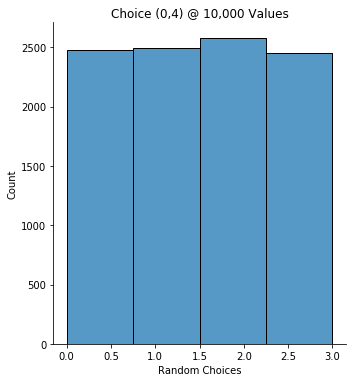

In [16]:
xcho = rng.choice((4), 10000)
ax = sns.displot(xcho, bins = 4) 
ax.set(xlabel = "Random Choices")
plt.title("Choice (0,4) @ 10,000 Values")
plt.show()

One quirk of the rng.choice function is that we can weight the results using the 'p' argument. In the below graph we should see our 4 random choices weighted per our p argument, the weighhts correspond to the indexes of the np.arrange(n) discussed above.

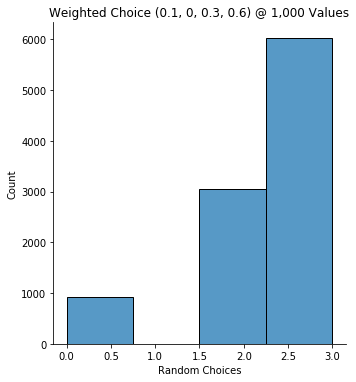

In [17]:
xcho = rng.choice((4), 10000,  p=[0.1, 0, 0.3, 0.6])
ax = sns.displot(xcho, bins  = 4)
ax.set(xlabel = "Random Choices")
plt.title("Weighted Choice (0.1, 0, 0.3, 0.6) @ 1,000 Values")
plt.show()

In [18]:
xcho

array([3, 3, 3, ..., 2, 3, 2], dtype=int64)

### Bytes (rng.bytes)

 Generator.bytes(length)
 
    "Return random bytes."[17]
    
Returns random bytes

## Permutations

The next sub-category within the numpy.random package is Permuations, which deals with the re-arranging or mixing of values within an array or sequence, without changing it's overall contents. The two modules are: 

1. shuffle
2. permutation

### 1. Shuffle

 Generator.shuffle(x, axis=0)
     
     "Modify a sequence in-place by shuffling its contents.
      The order of sub-arrays is changed but their contents remains the same."[7]
      
The above is fair concise, so let's see what happens in practice when we use this shuffle method.

We will just start with a random array of numbers

In [19]:
shuf = rng.integers(1, 10, size = 10)
shuf

array([1, 2, 1, 1, 3, 2, 6, 9, 6, 3], dtype=int64)

Now we will pass our array shuf through the shuffle function as an argument, the position or each value has now been shuffled. It is worth noting that this shuffle changes the value of the variable shuf to the new arrangement. i.e when we call shuf from this point on we will get the now-shuffled list/array back.

In [20]:
rng.shuffle(shuf)
shuf

array([9, 6, 3, 1, 2, 1, 3, 1, 2, 6], dtype=int64)

### 2. Permutation

 Generator.permutation(x, axis=0)
 
     "Randomly permute a sequence, or return a permuted range."[8]
     
As with the above, the description of what this function does is stragight forward, let's see what it does.

In [21]:
perm = rng.integers(1, 10, size = 10)
perm

array([3, 6, 1, 5, 8, 3, 5, 7, 8, 5], dtype=int64)

In [22]:
rng.permutation(perm)

array([8, 3, 1, 5, 5, 3, 8, 5, 6, 7], dtype=int64)

Ok, we can see that the aray has been permuted, but when we call the perm variable, below, we can see that the original array is returned, so unlike shuffle, permutation will not change the status of the varialbe passed through the function. in order to capture the permutation and use it again, we must assign a varialbe to it.

In [23]:
perm

array([3, 6, 1, 5, 8, 3, 5, 7, 8, 5], dtype=int64)

In [24]:
perm2= rng.permutation(perm)
perm2

array([5, 3, 6, 8, 8, 3, 5, 5, 1, 7], dtype=int64)

In [25]:
print(perm)
print(perm2)

[3 6 1 5 8 3 5 7 8 5]
[5 3 6 8 8 3 5 5 1 7]


## Distributions

Probability distributions is the mathematical function that gives the probabilites of occurrence of different possible outcomes for an experiment[18] Distributions fall into 2 main categories, characterised by the type of variables in the experiemnt, either discrete or continious.

Discrete varialbles are ones that can take on a countable range of values, whereas continuous variables are an uncountable set.

1. Binomial
2. Poisson
3. Exponential Distribution
4. Uniform
5. Normal (Gaussian)

In [26]:
def plots(distribution):
    ax = sns.displot(distribution, kde = True)
    return ax

### 1. Binomial

 Generator.binomial(n, p, size=None)
 
        "Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)"
       
![alt text here](https://numpy.org/doc/stable/_images/math/a3235d9c59e404c34cbb15d54a794631511dfbcc.svg)

Where $\n$ is the number of trials, $\p$ is the probability of success, and $\N$ is the number of successes.

The binomial distribution model operates on four key assumptions:
        1. Each cycle has one of two possible outcomes (success & failure)
        2. The probability of success is the same for each cycle
        3. Each cycle is independent of the others
        4. The number of trials carried out is a set number

So the Binomial distribution calculates the probability of success of a scenario with 2 distinct possible outcomes, leading it to be refferred to as a discrete probability function. Very often you will find people refer to the toss of a coin as an example of what the binomial distribution can calculate.

Calculating the probability one specific side of a dice appears, let's say 2 times in 6 rolls, is another equally attributable game of chance we can apply, as we can either have a success or failure. Firstly let's do a quick calculation on what is the rough result we would expect to see for the 2 sides of a die to appear in 6 rolls:
        Probability of our designated side appearing in one roll: 1/6
        Probability of our designated side appearing in two rolls: (1/6)^2
        Probability of other side appearing in one roll: 5/6
        Probability of other side appearing in four roll: (5/6)^4
        Number of possible success permuations: 6c2 (nCr)= 15[9]

In [27]:
probcalc = (((1/6)**2)*((5/6)**4))*15
probcalc

0.20093878600823045

Working it out, roughly, we get a 20% chance that on 6 rolls of a dice, our desinated side will appear two times.

So we are expecting the chances that we roll six of the same number in six rolls to be in line with the above value for x. We can calculate this out suing the binomial function in numpy. Graphing this out we can see the distribution of the number of successes in our six rolls, across our desired sample size. 

In [28]:
binom = rng.binomial(6, 0.1666667, 10000)
binom2 = (sum(rng.binomial(6, 0.1666667, 10000)==2)/10000)
binom2

0.202

In [29]:
def binomdf(n,p, siz):
    binom = rng.binomial(n,p, size = siz)
    return binom

In [30]:
x = sum((binomdf(6, 0.1666667, 10000)==2)/10000)
x

0.193699999999995

Given 10,000 tests we can see that the probability of getting 2 successful results is indeed roughly 20% when we run our np.random.binomial() function. We can graph this information. So using the binomial expansions in numpy, we can easily recreate scenarios such as a dice roll, high/low card games and the flip of a coin.

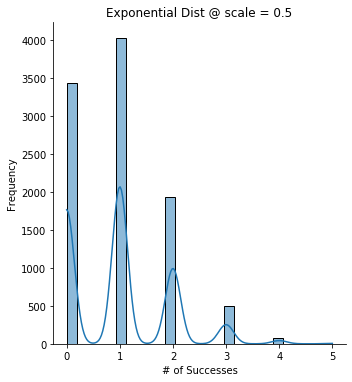

In [31]:
ax = plots(binomdf(6,0.1666667, 10000))
plt.title("Exponential Dist @ scale = 0.5")
ax.set(xlabel = "# of Successes",ylabel = "Frequency");

### 2. Poisson Distribution

Generator.poisson(lam=1.0, size=None)
 
        "Draw samples from a Poisson distribution.
         The Poisson distribution is the limit of the binomial distribution for large N."
         
Another discrete probability distribution, Poisson expresses the probability of how many events can happen in a fixed interval of time, if the events occur with a known continuous average rate and independently of the time since the last event.[10] Or, in laymans terms - a discrete event where the average time berween events is known, but the timing of these events is random[11]. Exampoes of such processes are movements in stock price, hits on a web page and the number of meteors hitting Earth.

As with the binomial diustribution there some assumptions which must be met before the Poisson distribution can be applied:[11]
    1. Events are independent of each other
    2. The average rate is constatnt
    3. Two events cannot occur simutaneously 
    
![alt text here](https://numpy.org/doc/stable/_images/math/c91108ae66a9a5e2feb9442c67962868e368fdc8.svg)
    
'lam' ($\lambda$ - lambda) above denotes the rate at which the event in question occurs. In the above formula: k is the number of times an event happens, and e the mathematical constant (approx. 2.71828). As the value for $\lambda$ changes, we will see the probability of seeing different number sof events in one interval change.

In [32]:
poiss = rng.poisson(4,10000)

In [33]:
def poissdf(lam, siz):
    poiss = rng.poisson(lam, size = siz)
    return poiss

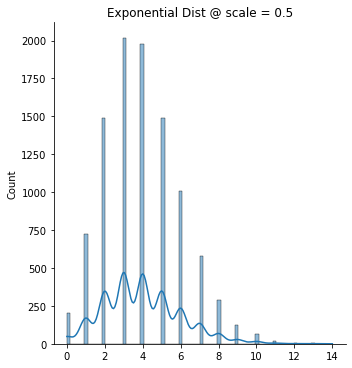

In [34]:
plots(poissdf(4,10000))
plt.title("Exponential Dist @ scale = 0.5")
ax.set(xlabel = "Poisson Dist @ lam = 4", ylabel = "Frequency");

### Exponential Distirbution

 Generator.exponential(scale=1.0, size=None)
 
"The exponential distribution is a continuous analogue of the geometric distribution. It describes many common situations, such as the size of raindrops measured over many rainstorms, or the time between page requests to Wikipedia."[12]
 
![alt text here](https://numpy.org/doc/stable/_images/math/e07802bacb29723c1c1503e40bdd2327cc749fe6.svg)
 
This distribution is much like the Poisson distribtuion discussed above, however rather than describe the likelihood of an event occurring, it describes the time between events in a Poisson process, it again uses the parameter $\lambda$ ($\lambda$ = 1/$\beta$).

In [35]:
def expondf(scale, siz):
    expon = (rng.exponential(scale, size = siz))
    return expon

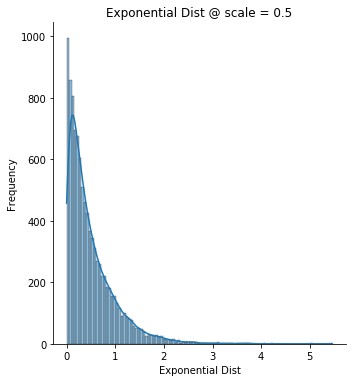

In [36]:
ax = plots(expondf(0.5, 10000))
plt.title("Exponential Dist @ scale = 0.5")
ax.set(xlabel = "Exponential Dist", ylabel = "Frequency");

### 4. Uniform Distribution

Generator.uniform(low=0.0, high=1.0, size=None)
 
     "Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by uniform."[13]
     
We have already seen what the unifom distribution from the random data section above, namely .integers() and .random(), the difference s being where the distribution is called from, we could say that this distribution is the default distribution of random numbers in Numpy. So as above we can test out what the distribution from the

![alt text here](https://numpy.org/doc/stable/_images/math/dd6cc267049993f4cee9a16302017c7c2355f045.svg)

In [37]:
def unifdf(low, high, siz):
    unif = rng.uniform(low, high, size = siz)
    return unif

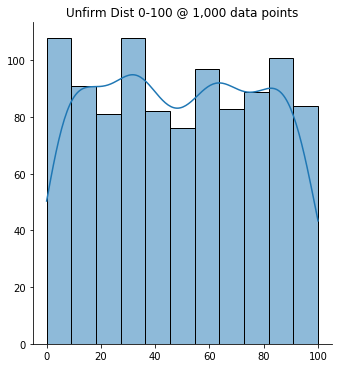

In [38]:
ax = plots(unifdf(0,100,1000))
plt.title("Unfirm Dist 0-100 @ 1,000 data points")
ax.set(xlabel = "", ylabel = "");


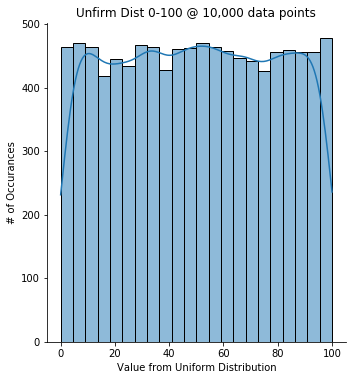

In [39]:
ax = plots(unifdf(0,100,10000))
plt.title("Unfirm Dist 0-100 @ 10,000 data points")
ax.set(xlabel = "Value from Uniform Distribution", ylabel = "# of Occurances");

So as we have previuously seen in our random data section, we see that as we increase the size of our sample from the unifrom distribution, we can see the graph trend towards a uniform distribution. 

### Normal (Gaussian) distribution

Generator.normal(loc=0.0, scale=1.0, size=None)



Finally, we get to what is the most famous and common of distributions, the Gaussian/Normal distribution, commonly called a bell curve. Often used in the natural and social sciences to represent real-valued random variables with unknown distributions. The normal distribution is known for it's fit on countless natural occurances; height/weight of individuals, IQ scores,and shoe size. 

A normal distribution has some key features; a bell-curve shape, the mean and median  are equal. Below we can see an example of a Standard Normal Distribution of mean = o, and a standard deviation of 1:

![alt text here](https://i.imgur.com/Mt3RyE0.png)


For all normal distributions:
68% of the data falls within 1 stdndard deviation of the mean
95% of the data falls within 2 standard deviations of the mean
99.7% of the data falls within 3 standard deviations of the mean

This is called the empirical rule or 68-95-99.7 rule, it is an expression of how many observations fall within a certain distance of the mean. as the standard deviation is often refferred to a as sigma, this rule has another name, The Three Sigma Rule[14]

The probability density function for the Gaussian distribution is:

![alt text here](https://numpy.org/doc/stable/_images/math/b4a4f5ca59e5559aa092b30b98184ec0bb689b7a.svg)

Where $\mu$ is the mean and $\sigma$ is the standard deviation, the square of the standard deviation $\sigma^{_{2}}$[15]

In [40]:
def normdf(mu, sigma, siz):
    norm = rng.normal(mu, sigma, size = siz)
    return(norm)

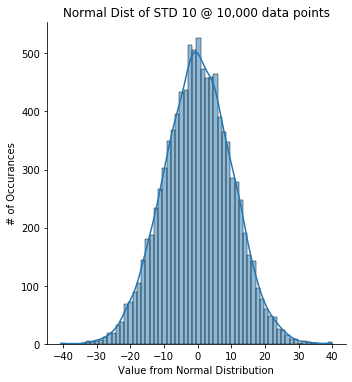

In [41]:
ax = plots(normdf(0,10,10000))
plt.title("Normal Dist of STD 10 @ 10,000 data points")
ax.set(xlabel = "Value from Normal Distribution", ylabel = "# of Occurances");


In [42]:
x = normdf(0,10,10000)

## Seeds In Generating Random Numbers

**Computers are deterministic**

As we have previously seen above, 'random' or pseudo-random numbers in Numpy merely appear to be random, they are determined by the program's alogrithm and the input provided by the user. Computers are about as good at generating random numbers as bricks are at flaoting in the air. In Numpy, a default a state of 'entropy' is taken off the host machine's operating system and this will dictate how the random number's are generated i.e the input to the algorithm. 

There is also an option for the user to dictate what this input can be, it takes the form of 'seeds', which can be viewed as a set start point for the random generator selected, from here this generator runs it's algorithm. If we run the same algorithm from the same start point (hence- seed), we will get the same results each time. Please see the below example, using a random seed of 42, we should be able to produce two identical arrays.[16]

In [43]:
rng =np.random.default_rng(seed=42)
rng.random((3, 3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363]])

In [44]:
x =np.random.default_rng(seed=42)
x.random((3, 3))

array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363]])

Below I have repeated the same code, but with seed 37 to show that different results will be produced for a different seed, but that replicating the seed will produce the same values.

In [45]:
x =np.random.default_rng(seed=37)
x.random((3, 3))

array([[0.70415303, 0.66166872, 0.06899324],
       [0.70280165, 0.31896221, 0.45009567],
       [0.98061453, 0.0644321 , 0.18368115]])

In [46]:
rng =np.random.default_rng(seed=37)
rng.random((3, 3))

array([[0.70415303, 0.66166872, 0.06899324],
       [0.70280165, 0.31896221, 0.45009567],
       [0.98061453, 0.0644321 , 0.18368115]])

The seed concept can apply to all random functions we have discussed in the abmove document, and acts in the same manner, creating repeatable and consistent results when running code. This can have many benefits to the end user:

    1. Repeatable code is great for testing
    2. Code is easier to share and provide tutorials
    3. Changing a varialbe to a constant greatly benefits the programmer and gives them flexibility in fixing formulas, predictions etc

Random seeds are used across a range of fields:

    1. Probability and Statistics 
    2. Computing (Monte Carlo methods)
    3. Deep Learning
    4. Machine learning
    5. Random Sampling

References:

1 - https://numpy.org/doc/stable/user/absolute_beginners.html

2 - https://numpy.org/doc/stable/reference/random/index.html

3 - https://numpy.org/doc/stable/reference/random/generator.html

4 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

5 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

6 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

7 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

8 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

9 - https://en.wikipedia.org/wiki/Combination

10 - https://en.wikipedia.org/wiki/Poisson_distribution

11 - https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

12 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

13 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

14 - https://www.dataquest.io/blog/basic-statistics-in-python-probability/

15 - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

16 - https://www.sharpsightlabs.com/blog/numpy-random-seed/

17 - https://numpy.org/doc/1.19/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

18 - https://en.wikipedia.org/wiki/Probability_distribution